### EDA on [Citi Bike trip data](https://ride.citibikenyc.com/system-data)

Data collected was published on Jan 6th 2022, 07:36:57 pm , [link to zipped file](https://s3.amazonaws.com/tripdata/JC-202112-citibike-tripdata.csv.zip)

## Read files and Check data information

In [1]:
#Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

C:\ProgramData\Miniconda3\envs\gis-sphinx\lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [6]:
datapath = '../data/raw/JC-202112-citibike-tripdata.csv'
#datapath2 = r"D:\AutoGIS\City-bike-mapping\202112-citibike-tripdata.csv\202112-citibike-tripdata.csv"

In [2]:
data2 = pd.read_csv(r"D:\AutoGIS\City-bike-mapping\202112-citibike-tripdata.csv\202112-citibike-tripdata.csv",
                   parse_dates=['started_at','ended_at'], low_memory=False)
data2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7AE6209F17967FF2,classic_bike,2021-12-07 08:54:24,2021-12-07 08:59:46,Broadway & Hancock St,4441.06,Lewis Ave & Madison St,4425.02,40.686630,-73.916800,40.686312,-73.935775,member
1,CCE209B6D683C96A,classic_bike,2021-12-13 21:22:35,2021-12-13 21:31:24,S 4 St & Wythe Ave,5204.05,Metropolitan Ave & Meeker Ave,5300.05,40.712859,-73.965903,40.714133,-73.952344,member
2,333961DE681551DA,classic_bike,2021-12-17 22:21:56,2021-12-17 22:30:41,6 Ave & Canal St,5500.07,University Pl & E 14 St,5905.14,40.722438,-74.005664,40.734814,-73.992085,member
3,E5F6240DEF91E399,classic_bike,2021-12-13 17:44:19,2021-12-13 17:51:35,E 2 St & Avenue C,5476.03,E 11 St & 3 Ave,5788.16,40.720874,-73.980858,40.731270,-73.988490,member
4,B93587D5FA305113,classic_bike,2021-12-04 16:03:04,2021-12-04 16:06:47,Columbia St & Degraw St,4422.04,Atlantic Ave & Furman St,4614.04,40.685930,-74.002424,40.691652,-73.999979,member


In [3]:
#Read in the downloaded data
data = pd.read_csv(datapath, parse_dates=['started_at','ended_at'])
#Check top 5 rows of the data
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,DE8FDF918B766B34,classic_bike,2021-12-22 18:44:12,2021-12-22 18:49:56,Marin Light Rail,JC013,Warren St,JC006,40.714584,-74.042817,40.721124,-74.038051,member
1,DFFA588D5D188F27,classic_bike,2021-12-11 12:32:58,2021-12-11 12:57:13,Warren St,JC006,Warren St,JC006,40.721124,-74.038051,40.721124,-74.038051,member
2,3A2A9CA5E1CC449A,classic_bike,2021-12-18 11:08:40,2021-12-18 11:21:10,Warren St,JC006,Warren St,JC006,40.721124,-74.038051,40.721124,-74.038051,member
3,72216E8C562A4E02,classic_bike,2021-12-11 17:28:08,2021-12-11 17:42:16,5 Corners Library,JC018,Warren St,JC006,40.734961,-74.059503,40.721124,-74.038051,member
4,A7B30B3C966FD8A1,classic_bike,2021-12-11 10:39:41,2021-12-11 10:54:56,City Hall - Washington St & 1 St,HB105,Warren St,JC006,40.737360,-74.030970,40.721124,-74.038051,casual


In [3]:
#Check data information number of rows, columns
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748287 entries, 0 to 1748286
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 173.4+ MB


In [4]:
data2['rideable_type'].unique()

array(['classic_bike', 'docked_bike'], dtype=object)

In [13]:
#Create new column from starttime column showing the day of the week
data2['start_day']=data['started_at'].apply(lambda x:x.day_name())

data2.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_day
0,7AE6209F17967FF2,classic_bike,2021-12-07 08:54:24,2021-12-07 08:59:46,Broadway & Hancock St,4441.06,Lewis Ave & Madison St,4425.02,40.686630,-73.916800,40.686312,-73.935775,member,Wednesday
1,CCE209B6D683C96A,classic_bike,2021-12-13 21:22:35,2021-12-13 21:31:24,S 4 St & Wythe Ave,5204.05,Metropolitan Ave & Meeker Ave,5300.05,40.712859,-73.965903,40.714133,-73.952344,member,Saturday
2,333961DE681551DA,classic_bike,2021-12-17 22:21:56,2021-12-17 22:30:41,6 Ave & Canal St,5500.07,University Pl & E 14 St,5905.14,40.722438,-74.005664,40.734814,-73.992085,member,Saturday


## Using Seaborn and Matplotlib for exploring the data

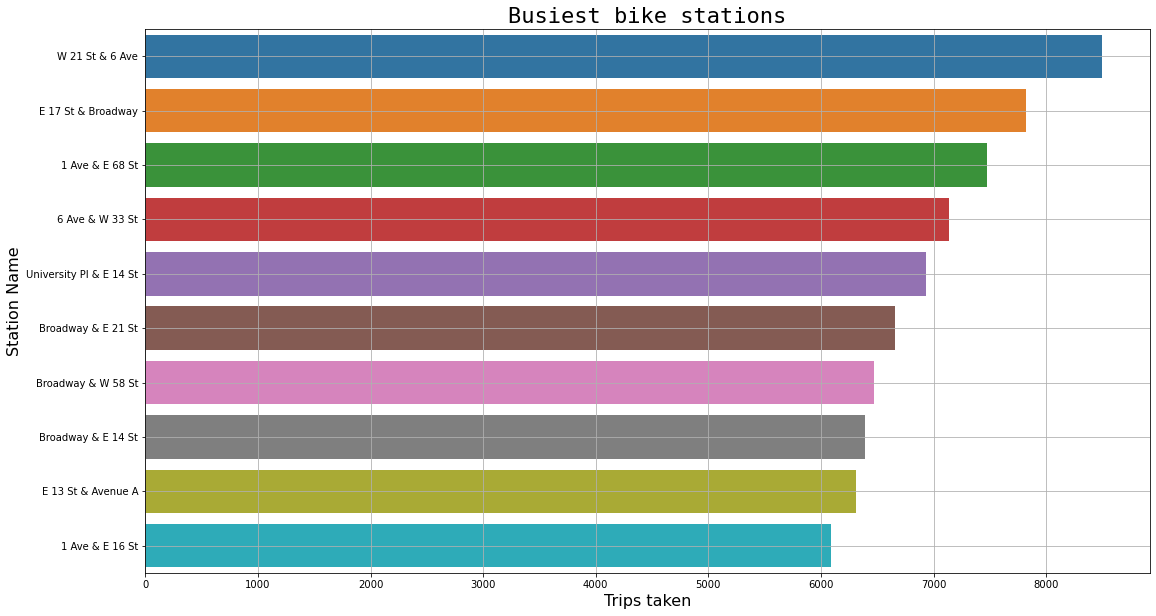

In [15]:
#Use seaborn and matplotlib to plot the top 10 busiest stations
startstation = data2['start_station_name'].value_counts()[:10]
plt.figure(figsize=(18,10))
sns.barplot( x=startstation.values , y=list(startstation.index), 
 orient="h" )

#Add plot title, label axes and grid
plt.title('Busiest bike stations', size=22, family='monospace')
plt.ylabel('Station Name', fontsize=16)
plt.xlabel('Trips taken', fontsize=16)
plt.grid()
plt.tight_layout

#Save the output to file
plt.savefig("../images/busiest_stations2021.png", facecolor='white', dpi=300)

plt.show()

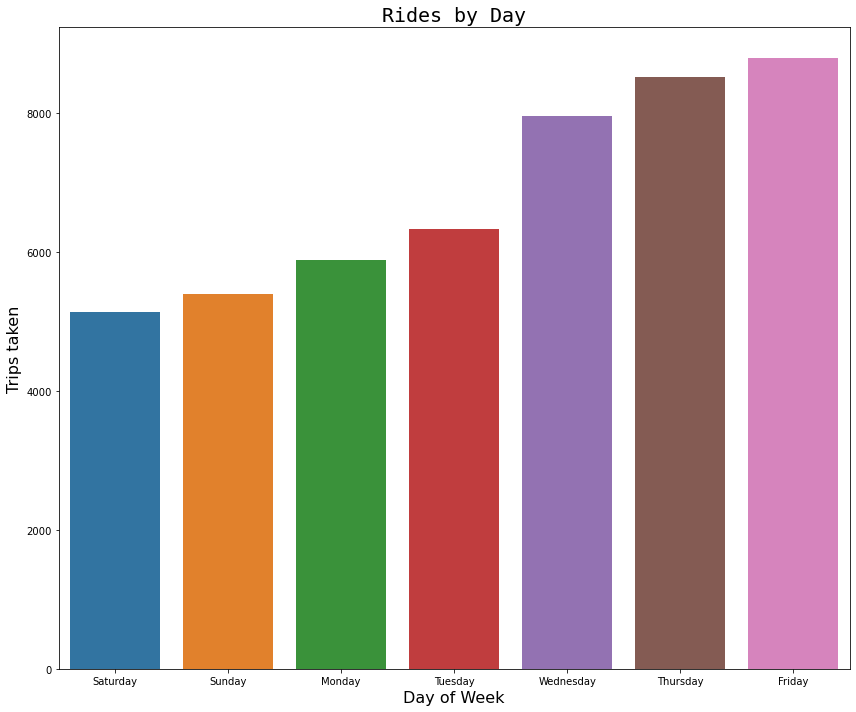

In [16]:
#Group by day of the week and create a subset of the data
group = data2.groupby(['start_day'], as_index=False).agg(
    count_col=pd.NamedAgg(column="start_day", aggfunc="count")
)
group.rename(columns={'start_day': 'Day of Week', 
                    'count_col':'Trips taken'}, inplace=True)
group.sort_values(by='Trips taken',inplace=True)

#Use seaborn and matplotlib to plot graph showing busiest day of the week
plt.figure(figsize=(12,10))
ax = sns.barplot(x = 'Day of Week',
            y = 'Trips taken',
            data = group)
#Add plot title, label axes
plt.title('Rides by Day', size=20, family='monospace')
plt.ylabel('Trips taken', fontsize=16)
plt.xlabel('Day of Week', fontsize=16)
plt.tight_layout()

#Save the output to file
plt.savefig("../images/rides_by_day_Dec_2021.png", facecolor='white',dpi=300)

plt.show()

In [17]:
#Using the aggregate with groupby to group and 
#count the number of occurences in each group and assign to a new dataframe
df_grouped = data2.groupby(['start_station_id', 'start_station_name', 'start_lat',
       'start_lng'], as_index=False).agg(
    count_col=pd.NamedAgg(column="start_station_id", aggfunc="count")
)

print(len(df_grouped))

# Rename our columns
df_grouped.rename(columns={'start_station_id': 'Station ID', 
                    'start_station_name': 'Station Name', 
                    'start_lat': 'Lat', 
                    'start_lng': 'Lon', 
                    'count_col':'Number of Trips'}, inplace=True)

# Saving the dataframe to csv file
outpath = '../data/2021Dec_revised.csv'
df_grouped.to_csv(outpath, index=False)

2128


In [18]:
#Print statement to check for duplicate values
print(f"There are {df_grouped.duplicated(subset='Station ID').sum()},"
      f" duplicate values from a total of {len(df_grouped)},"
      f" values in the Dec 2021 cleaned dataset.")

There are 618, duplicate values from a total of 2128, values in the Dec 2021 cleaned dataset.


## Converting DataFrame to GeoDataFrame

### Read and process our cleaned 2021 datasets for mapping


In [21]:
#Convert DataFrame to GeoDataFrame
#Assign crs to the geodataframe
#sorting dataframe by Trips

gdf_Dec2021 = gpd.GeoDataFrame(df_grouped, 
                               geometry=gpd.points_from_xy(df_grouped.Lat, df_grouped.Lon), 
                               crs='epsg:4326'
                              )
# Let's make a backup copy of our data
gdf_merc21 = gdf_Dec2021.copy()
#We will use the backup in our subsequent analysis
gdf_merc21 = gdf_merc21.to_crs(epsg=3857)

#sorting 2021 data frame by Trips
gdf_merc21.sort_values("Number of Trips", axis = 0, ascending = False,
                 inplace = True, na_position ='last')

#Assign the sorted dataframe top 100 rows to a dataframe to be used in our maps
gdf_2021_n100 = gdf_merc21.iloc[:100]

gdf_2021_n100

,Station ID,Station Name,Lat,Lon,Number of Trips,geometry
1047,6140.05,W 21 St & 6 Ave,40.741740,-73.994156,8453,POINT (4535349.716 -12513185.284)
993,5980.07,E 17 St & Broadway,40.737050,-73.990093,7762,POINT (4534827.645 -12511545.340)
1352,6822.09,1 Ave & E 68 St,40.765005,-73.958185,7467,POINT (4537939.627 -12498679.134)
1131,6364.07,6 Ave & W 33 St,40.749013,-73.988484,7069,POINT (4536159.345 -12510895.945)
970,5905.14,University Pl & E 14 St,40.734814,-73.992085,6934,POINT (4534578.752 -12512349.413)
...,...,...,...,...,...,...
1081,6215.04,W 25 St & 6 Ave,40.743954,-73.991449,3808,POINT (4535596.224 -12512092.569)
832,5553.10,E 2 St & Avenue A,40.723077,-73.985836,3804,POINT (4533272.250 -12509827.457)
918,5755.14,University Pl & E 8 St,40.731437,-73.994903,3785,POINT (4534202.853 -12513487.214)
732,5342.10,Allen St & Hester St,40.716059,-73.991908,3739,POINT (4532490.917 -12512277.799)


## Static Map

HTTPError: Tile URL resulted in a 404 error. Double-check your tile url:
https://stamen-tiles-a.a.ssl.fastly.net/terrain/14/10044/13300.png

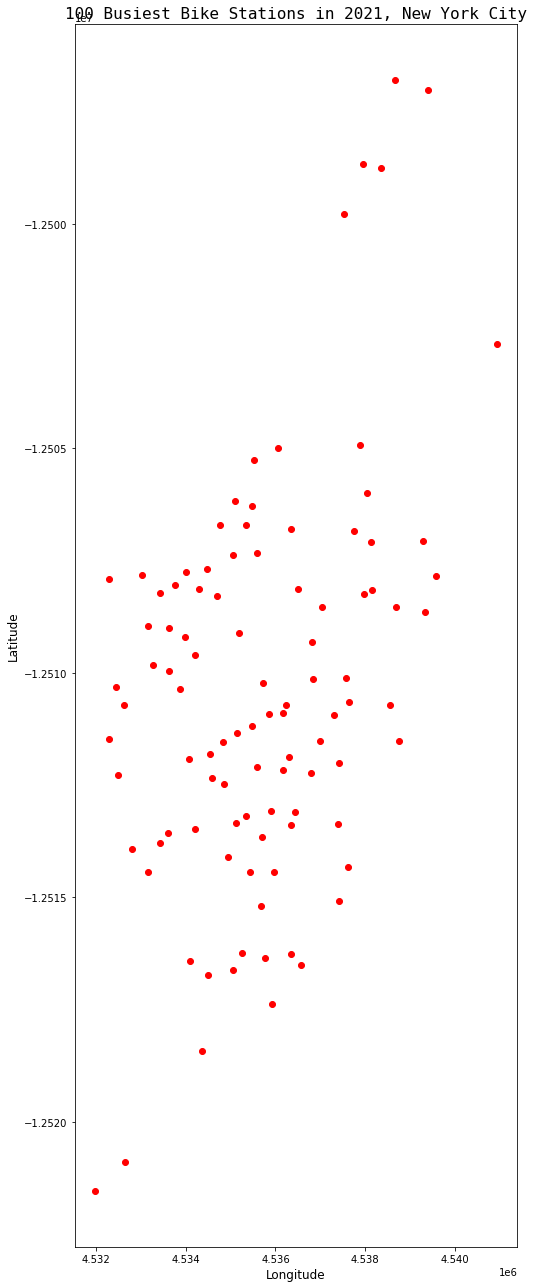

In [23]:
# Tests on BaseMaps
#Import matplotlib package for our plotting and contextly for our basemaps
import matplotlib.pyplot as plt
import contextily as ctx

# Create subplot for 2018 data
fig, ax = plt.subplots(figsize=(15,18))

#Plot the static map
gdf_2021_n100.plot(ax=ax,c="red") 

# Set title and label axes
plt.title("100 Busiest Bike Stations in 2021, New York City", 
          fontsize=16,family="Monospace")
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()

#Add basemap from contextily
ctx.add_basemap(ax)

## Interactive Map

In [129]:
#Import folium package for interactive mapping
import folium

#Create Map instance
m=folium.Map(location=[40.751873, -73.977706], zoom_start=13, attr='MyData')

#Add another basemap layer
#folium.TileLayer('OpenStreetMap', show =True).add_to(m)

#Add Title to Interactive map
loc = 'Top 100, Busiest Bike Stations in New York City in Dec 2021'
title_html = '''
             <h3 align="center" style="font-size:18px"><b>{}</b></h3>
             '''.format(loc) 
m.get_root().html.add_child(folium.Element(title_html))

#Create feature groups
f1=folium.FeatureGroup("Busiest Stations in 2021")

#Add the dataframes to our feature groups
gdf_Dec2021 = folium.GeoJson(gdf_Dec2021,marker=folium.Marker(
                        icon=folium.Icon(color='red')),
                        tooltip=folium.GeoJsonTooltip(
                        fields=["Station Name","Number of Trips"]),
                       ).add_to(f1)
#Add feature groups to Map instance
f1.add_to(m)

#Add layer Control
folium.LayerControl().add_to(m)  # use folium to add layer control
m

In [130]:
outfp = "../images/interactive_map.html"
m.save(outfp)